In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings 
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
# To get the URL for downloading raw Github data got to the repo: 

"""https://github.com/sidharth178/Mall-Customers-Segmentation/blob/master/Dataset/Mall_Customers.csv)"""

# Then click the three dots (...), then 'View' on the 'View' page, grab the link and use as 'url' (below);

In [2]:
# Load the Mall Customers dataset

url = "https://raw.githubusercontent.com/sidharth178/Mall-Customers-Segmentation/refs/heads/master/Dataset/Mall_Customers.csv"
df = pd.read_csv(url)

# Display the first few rows
df.shape
df.head()
df.info()

(200, 5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


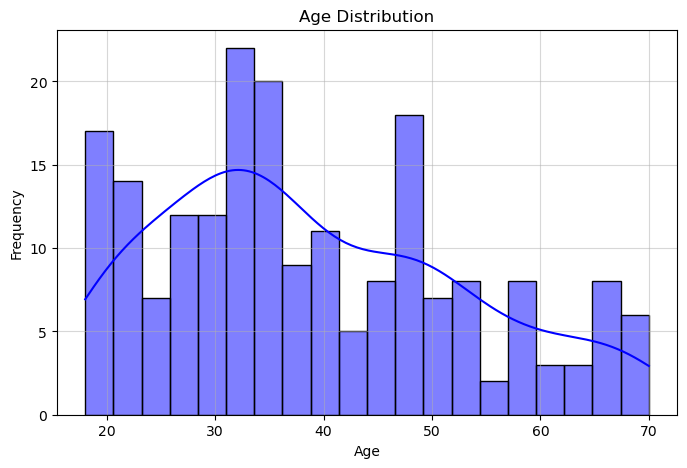

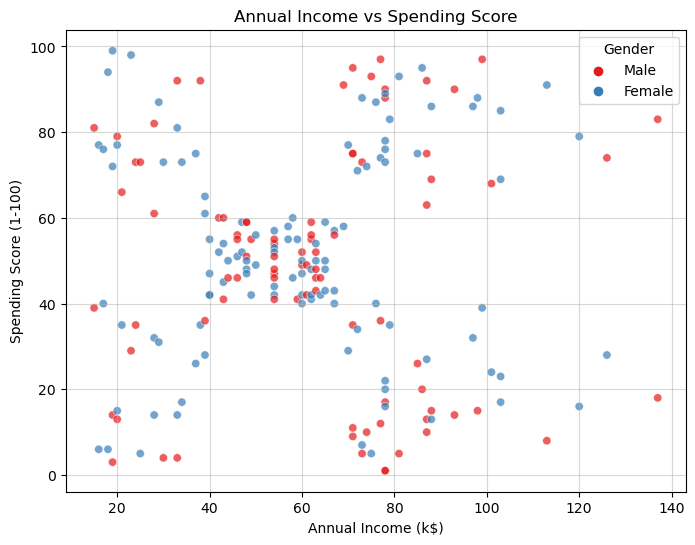

In [3]:
# Distribution of Age
plt.figure(figsize=(8, 5))
sns.histplot(
    df['Age'], kde=True
    , bins=20, color='blue'
)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.show();

# Scatter plot of Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df
    , x='Annual Income (k$)'
    , y='Spending Score (1-100)'
    , hue='Gender'
    , palette='Set1'
    , alpha=0.7
)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.grid(alpha=0.5)
plt.show();

In [4]:
# Select features for clustering
X = df[['Annual Income (k$)'
        , 'Spending Score (1-100)']]

# Scale the data for K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Verify scaling
scaled_df = pd.DataFrame(
    X_scaled
    , columns=X.columns
)

scaled_df.describe().round(6)

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,-0.000000,-0.000000
std,1.002509,1.002509
min,-1.738999,-1.910021
25%,-0.727509,-0.599793
50%,0.035879,-0.007764
75%,0.665675,0.885132
max,2.917671,1.894492


In [6]:
# Set up an empty list to store SSD (Sum of Squared Distances)

ssd = []

# Test K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k
        , init='k-means++'
        , max_iter=300
        , n_init=10
        , random_state=27
    )
    kmeans.fit(X_scaled)
    ssd.append(kmeans.inertia_)

KMeans(n_clusters=1, n_init=10, random_state=27)

KMeans(n_clusters=2, n_init=10, random_state=27)

KMeans(n_clusters=3, n_init=10, random_state=27)

KMeans(n_clusters=4, n_init=10, random_state=27)

KMeans(n_clusters=5, n_init=10, random_state=27)

KMeans(n_clusters=6, n_init=10, random_state=27)

KMeans(n_clusters=7, n_init=10, random_state=27)

KMeans(n_init=10, random_state=27)

KMeans(n_clusters=9, n_init=10, random_state=27)

KMeans(n_clusters=10, n_init=10, random_state=27)

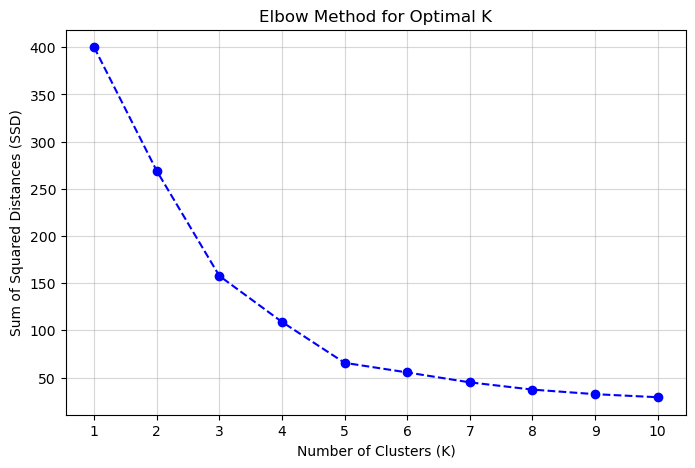

In [7]:
# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(
    range(1, 11)
    , ssd, marker='o'
    , linestyle='--'
    , color='b'
)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.xticks(range(1, 11))
plt.grid(alpha=0.5)
plt.show();

In [8]:
# Compute silhouette scores for K values 
# from 2 to 10

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(
        n_clusters=k
        , init='k-means++'
        , max_iter=300
        , n_init=10
        , random_state=27
    )
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(
        silhouette_score(
            X_scaled, labels)
    )

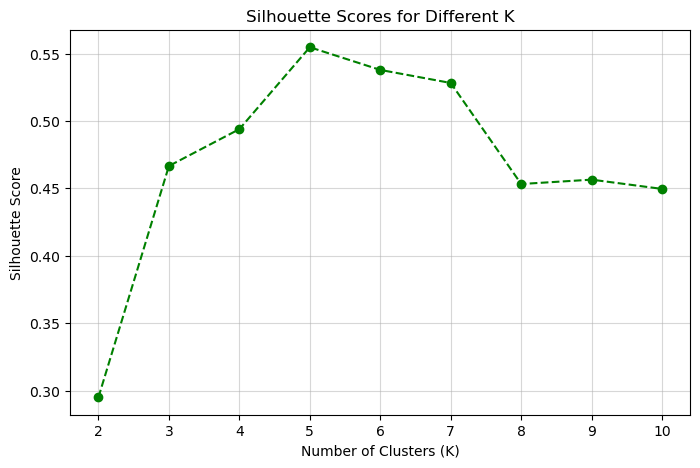

In [9]:
# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(
    range(2, 11)
    , silhouette_scores
    , marker='o'
    , linestyle='--'
    , color='g'
)
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(alpha=0.5)
plt.show();

In [10]:
# Set the optimal number of clusters (from the elbow or silhouette method)
optimal_k = 5

# Fit the K-Means model
kmeans = KMeans(
    n_clusters=optimal_k
    , init='k-means++'
    , max_iter=300
    , n_init=10
    , random_state=27
)
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=10, random_state=27)

In [11]:
# Add the cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4


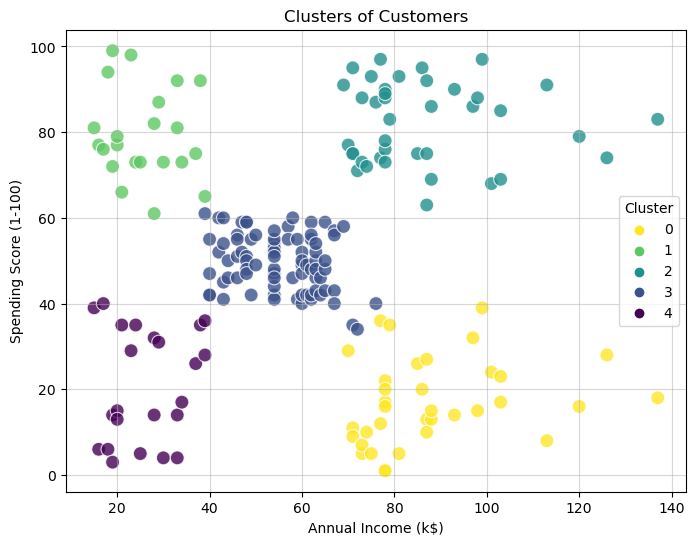

In [12]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df
    , x='Annual Income (k$)'
    , y='Spending Score (1-100)'
    , hue='cluster'
    , palette='viridis_r'
    , s=100
    , alpha=0.8
)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(alpha=0.5)
plt.show();

In [13]:
# Experiment: What happens if we switch to MinMaxScaler???

# Dropping the scaled_df for posterity:

# Verify scaling
scaled_df = pd.DataFrame(
    X_scaled
    , columns=X.columns
)

scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [15]:
from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()

m_X_scaled = m_scaler.fit_transform(X)

In [17]:
# Verify scaling
m_scaled_df = pd.DataFrame(
    m_X_scaled
    , columns=X.columns
)

m_scaled_df.head()

,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.387755
1,0.000000,0.816327
2,0.008197,0.051020
3,0.008197,0.775510
4,0.016393,0.397959


In [18]:
# Set up an empty list to store SSD (Sum of Squared Distances)

ssd = []

# Test K values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(
        n_clusters=k
        , init='k-means++'
        , max_iter=300
        , n_init=10
        , random_state=27
    )
    kmeans.fit(m_X_scaled)
    ssd.append(kmeans.inertia_)

KMeans(n_clusters=1, n_init=10, random_state=27)

KMeans(n_clusters=2, n_init=10, random_state=27)

KMeans(n_clusters=3, n_init=10, random_state=27)

KMeans(n_clusters=4, n_init=10, random_state=27)

KMeans(n_clusters=5, n_init=10, random_state=27)

KMeans(n_clusters=6, n_init=10, random_state=27)

KMeans(n_clusters=7, n_init=10, random_state=27)

KMeans(n_init=10, random_state=27)

KMeans(n_clusters=9, n_init=10, random_state=27)

KMeans(n_clusters=10, n_init=10, random_state=27)